# Modelo definitivo Educación Continua GP

## Tabla de contenidos
    1. Carga librerías y base de datos
    2. Manejo de bases de datos
    3. Construcción modelo definitivo
    4. Plan piloto

## 1. Carga librerías y base de datos

In [1]:
%pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=b53fe312dc9f06f366d048d90bf0defea0af2ead7457238ad28291623a0de88d
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends


In [2]:
%pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.9 MB/s 


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import datetime as dt
import unidecode
from pytrends.request import TrendReq
import math
from datetime import datetime
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

#plt.style.use('ggplot')

## 2. Manejo de bases de datos

### 2.1 Carga la fuente de datos

In [4]:
# se carga la fuente de datos
path = '/content/EstructuraBaseTest-gp.csv'
data = pd.read_csv(path, delimiter=';', encoding='utf-8')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Consectutivo_curso        116 non-null    object 
 1   Nombre                    116 non-null    object 
 2   Fecha_inicio              116 non-null    object 
 3   Fecha_creación            116 non-null    object 
 4   Curso_nuevo               116 non-null    object 
 5   Programa                  116 non-null    object 
 6   NumCursos                 116 non-null    int64  
 7   NumCursosFac              116 non-null    int64  
 8   Keywords                  116 non-null    object 
 9   Valor_por_hora            116 non-null    float64
 10  Categoría                 116 non-null    object 
 11  Facultad                  116 non-null    object 
 12  Modalidad                 116 non-null    object 
 13  Estado                    116 non-null    object 
 14  Valor_Tari

In [6]:
data


,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,...,Valor_Tarifa,Departamento,Estado.1,Punto_equilibrio,Meta,Cupomaximo,Inscritos,Cantidadinscritostotales,Exitoso,validaExitoso
0,CUR-0027485,Programa infantil y juvenil de formación music...,1/02/2020,1/12/2019,Si,Si,184,31,"cursos de musica, cursos de canto, interpretac...",41462.50,...,3317000.0,Música,Finalizado,84.0,100,150,68,68,0,0
1,CUR-0028159,Edición de textos en LaTeX,25/02/2020,1/12/2019,Si,No,184,8,"textos en latex, edicion de textos en ltex, cu...",58300.00,...,1166000.0,Ciencias,Finalizado,9.0,15,25,7,7,0,0
2,CUR-0028168,Artes escénicas de Japón,23/04/2020,1/02/2020,Si,No,132,36,"cultura japonesa, arte japones, pintura japonesa",56250.00,...,1350000.0,Historia del Arte,Finalizado,9.0,15,20,1,11,0,0
3,CUR-0028170,Cultura popular de Japón,10/09/2020,1/07/2020,Si,No,116,30,"cultura japonesa, arte japones, pintura japonesa",56250.00,...,1350000.0,Historia del Arte,Finalizado,11.0,15,20,3,13,0,0
4,CUR-0028172,Cerámica: técnica modelado,8/02/2020,1/12/2019,Si,No,184,31,"humanidades, facultad de humanidades, carreras...",51818.18,...,1710000.0,Arte,Finalizado,11.0,15,17,8,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,17/11/2021,1/09/2021,Si,No,283,14,"RSL, ensayos clínicos, MA, evidencia, RSL-MA, ...",107142.86,...,1500000.0,Medicina,Finalizado,7.0,15,19,18,18,1,1
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,19/11/2021,1/09/2021,No,No,283,23,"Bolsa, Inversiones, Economía, Riesgo de pérdida.",60625.00,...,970000.0,Economía,Finalizado,11.0,15,30,30,30,1,1
113,CUR-0037026,Democracia ambiental en América Latina,15/02/2022,1/12/2021,Si,No,276,16,"Democracia, democracia ambiental, América Latina",53846.15,...,1400000.0,Centro Interdisciplinario de Estudios sobre De...,Finalizado,50.0,50,58,58,58,1,1
114,CUR-0037045,Introducción al análisis de datos en Python,15/02/2022,1/12/2021,No,No,276,27,"Datos, Economía, Analítica, Operaciones Matemá...",71333.33,...,1498000.0,Economía,Finalizado,11.0,15,25,13,24,1,1


### 2.2 copia de los datos a un nuevo dataframe

In [7]:
data_modelo = pd.DataFrame(data.loc[:, ['Consectutivo_curso','Nombre','Fecha_inicio','Fecha_creación','Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords','Valor_por_hora','Categoría','Facultad','Modalidad','validaExitoso']])

In [8]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso
0,CUR-0027485,Programa infantil y juvenil de formación music...,1/02/2020,1/12/2019,Si,Si,184,31,"cursos de musica, cursos de canto, interpretac...",41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0
1,CUR-0028159,Edición de textos en LaTeX,25/02/2020,1/12/2019,Si,No,184,8,"textos en latex, edicion de textos en ltex, cu...",58300.00,Actualización Profesional,CIENCIAS,Presencial,0
2,CUR-0028168,Artes escénicas de Japón,23/04/2020,1/02/2020,Si,No,132,36,"cultura japonesa, arte japones, pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0
3,CUR-0028170,Cultura popular de Japón,10/09/2020,1/07/2020,Si,No,116,30,"cultura japonesa, arte japones, pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0
4,CUR-0028172,Cerámica: técnica modelado,8/02/2020,1/12/2019,Si,No,184,31,"humanidades, facultad de humanidades, carreras...",51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,17/11/2021,1/09/2021,Si,No,283,14,"RSL, ensayos clínicos, MA, evidencia, RSL-MA, ...",107142.86,Actualización Profesional,MEDICINA,Virtual,1
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,19/11/2021,1/09/2021,No,No,283,23,"Bolsa, Inversiones, Economía, Riesgo de pérdida.",60625.00,Actualización Profesional,ECONOMIA,Virtual,1
113,CUR-0037026,Democracia ambiental en América Latina,15/02/2022,1/12/2021,Si,No,276,16,"Democracia, democracia ambiental, América Latina",53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1
114,CUR-0037045,Introducción al análisis de datos en Python,15/02/2022,1/12/2021,No,No,276,27,"Datos, Economía, Analítica, Operaciones Matemá...",71333.33,Actualización Profesional,ECONOMIA,Virtual,1


### 2.3 trasnfromacion de variables y manejo de null

In [9]:
# # Transformaciones a variables de la base 
data_modelo['Curso_nuevo'] = data_modelo['Curso_nuevo'].replace({'Si':1, 'No':0})
data_modelo['Programa'] = data_modelo['Programa'].replace({'Si':1, 'No':0})

In [10]:
# Transformar formato de las fechas  
data_modelo['Fecha_creación'] =  pd.to_datetime(data_modelo['Fecha_creación'], format='%d/%m/%Y')
data_modelo['Fecha_inicio']   =  pd.to_datetime(data_modelo['Fecha_inicio']  , format='%d/%m/%Y')

In [11]:
#Agregar ventanas de tiempo
data_modelo['Fecha_busqueda'] =  data_modelo['Fecha_creación'] + pd.Timedelta('-1 days')
data_modelo['Fecha_ventana']  =  data_modelo['Fecha_creación'] + pd.Timedelta('-180 days')


In [12]:
# Variables a imputar con media

In [13]:
data_modelo['Valor_por_hora'].mean()

56219.08844827587

In [14]:
data_modelo['Valor_por_hora']=data_modelo['Valor_por_hora'].fillna(data_modelo['Valor_por_hora'].mean())

In [15]:
data_modelo['Keywords']=data_modelo['Keywords'].fillna('n/a')

In [16]:
#Separación de keywords
#data_modelo = data_modelo.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
#data_modelo = data_modelo.withColumn('Keywords', F.split(F.col('Keywords'), ','))
#data_modelo = data_modelo.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [17]:
import re
# meta lenguaje 

In [18]:
print (data_modelo.iloc[2])

Consectutivo_curso                                         CUR-0028168
Nombre                                        Artes escénicas de Japón
Fecha_inicio                                       2020-04-23 00:00:00
Fecha_creación                                     2020-02-01 00:00:00
Curso_nuevo                                                          1
Programa                                                             0
NumCursos                                                          132
NumCursosFac                                                        36
Keywords              cultura japonesa, arte japones, pintura japonesa
Valor_por_hora                                                 56250.0
Categoría                                Artes, Ciencias y Humanidades
Facultad                                           ARTES Y HUMANIDADES
Modalidad                                                      Virtual
validaExitoso                                                        0
Fecha_

In [19]:
print (data_modelo.Consectutivo_curso.iloc[2])

CUR-0028168


In [20]:
print (data_modelo.Keywords.iloc[2])

cultura japonesa, arte japones, pintura japonesa


In [21]:
data_modelo.Keywords =   data_modelo.Keywords.str.replace(r',\s', ',', regex=True )


In [22]:
print (data_modelo.Keywords.iloc[2])

cultura japonesa,arte japones,pintura japonesa


In [23]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
data_modelo[['Curso_nuevo', 'Programa', 'Categoría', 'Facultad', 'Modalidad']] = data_modelo[['Curso_nuevo', 'Programa', 'Categoría', 'Facultad', 'Modalidad']].astype('category') 

In [24]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana
0,CUR-0027485,Programa infantil y juvenil de formación music...,2020-02-01,2019-12-01,1,1,184,31,"cursos de musica,cursos de canto,interpretació...",41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04
1,CUR-0028159,Edición de textos en LaTeX,2020-02-25,2019-12-01,1,0,184,8,"textos en latex,edicion de textos en ltex,curs...",58300.00,Actualización Profesional,CIENCIAS,Presencial,0,2019-11-30,2019-06-04
2,CUR-0028168,Artes escénicas de Japón,2020-04-23,2020-02-01,1,0,132,36,"cultura japonesa,arte japones,pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-01-31,2019-08-05
3,CUR-0028170,Cultura popular de Japón,2020-09-10,2020-07-01,1,0,116,30,"cultura japonesa,arte japones,pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-06-30,2020-01-03
4,CUR-0028172,Cerámica: técnica modelado,2020-02-08,2019-12-01,1,0,184,31,"humanidades,facultad de humanidades,carreras d...",51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,2021-11-17,2021-09-01,1,0,283,14,"RSL,ensayos clínicos,MA,evidencia,RSL-MA,enfoq...",107142.86,Actualización Profesional,MEDICINA,Virtual,1,2021-08-31,2021-03-05
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,2021-11-19,2021-09-01,0,0,283,23,"Bolsa,Inversiones,Economía,Riesgo de pérdida.",60625.00,Actualización Profesional,ECONOMIA,Virtual,1,2021-08-31,2021-03-05
113,CUR-0037026,Democracia ambiental en América Latina,2022-02-15,2021-12-01,1,0,276,16,"Democracia,democracia ambiental,América Latina",53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1,2021-11-30,2021-06-04
114,CUR-0037045,Introducción al análisis de datos en Python,2022-02-15,2021-12-01,0,0,276,27,"Datos,Economía,Analítica,Operaciones Matemátic...",71333.33,Actualización Profesional,ECONOMIA,Virtual,1,2021-11-30,2021-06-04


In [25]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Consectutivo_curso  116 non-null    object        
 1   Nombre              116 non-null    object        
 2   Fecha_inicio        116 non-null    datetime64[ns]
 3   Fecha_creación      116 non-null    datetime64[ns]
 4   Curso_nuevo         116 non-null    category      
 5   Programa            116 non-null    category      
 6   NumCursos           116 non-null    int64         
 7   NumCursosFac        116 non-null    int64         
 8   Keywords            116 non-null    object        
 9   Valor_por_hora      116 non-null    float64       
 10  Categoría           116 non-null    category      
 11  Facultad            116 non-null    category      
 12  Modalidad           116 non-null    category      
 13  validaExitoso       116 non-null    int64         

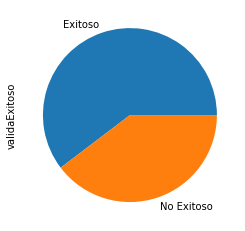

In [26]:
# visaulizamos  el % de cuross exitos y no exitos 
data_modelo['validaExitoso'].value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'}).plot.pie()

In [27]:
# imprimme  el % de cuross exitos y no exitos 
data.validaExitoso.value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'})

Exitoso       0.603448
No Exitoso    0.396552
Name: validaExitoso, dtype: float64

In [28]:
import seaborn as sns # Libraría interesante para hacer visualizaciones

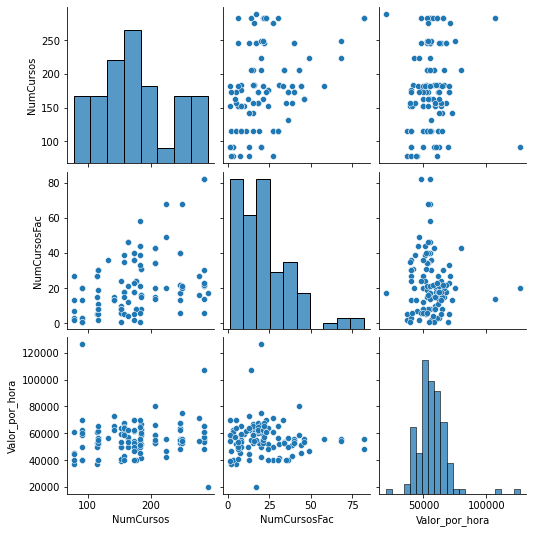

In [29]:
# visualizamos la correlación de las variables tipo numerico 
sns.pairplot(data_modelo.loc[:, ['NumCursos','NumCursosFac','Valor_por_hora']])

## 3 funcion  Google Trends

In [30]:
#Completar información con pytrens - Google Trends
def get_google_trend(keywords, start_date, end_date):
  start_date_str = start_date.strftime('%Y-%m-%d')
  end_date_str = end_date.strftime('%Y-%m-%d')
  keywords_list = list(keywords)
  keywords_list = [kw.lower().strip().replace(r'[^\w\s]', '') for kw in keywords_list]
  print(keywords_list)
  df = None
  max_tol = 30
  init_tol = 1
  pytrend = TrendReq(hl='su', tz=360, geo='CO')
  try:
    pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
    df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
  except:
    request_success = False
    while (not request_success) and (init_tol < max_tol):
      time.sleep(1+round(random.random(), 2))
      try:
        pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
        df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
        request_success = True
      except:
        request_success = False
        init_tol = init_tol + 1
  if df is None:
    return 0
  means = df.mean()
  return round(float(means.mean()), 2)



### 3.1 Busqueda kerword

In [31]:
%pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 33.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=154648dfa308a6d36e5fdcbb0ad2cb659a451d08dadc7a970d732f5bba11690e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [32]:
#Importar utilidades de pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.shell import spark
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.sql.types import IntegerType,BooleanType,DateType

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.1
      /_/

Using Python version 3.8.16 (default, Dec  7 2022 01:12:13)
Spark context Web UI available at http://be22380ce887:4040
Spark context available as 'sc' (master = local[*], app id = local-1672665834051).
SparkSession available as 'spark'.


In [ ]:
#Limpieza cache spark
spark.catalog.clearCache()

In [ ]:
data_modelo_df = spark.createDataFrame(data_modelo)

In [ ]:
#Separación de keywords
data_modelo_df = data_modelo_df.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.split(F.col('Keywords'), ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [ ]:
df_rows = data_modelo_df.collect()

In [ ]:
#df_rows

In [ ]:
data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.lit(0))
for row in df_rows:
  keywords = get_google_trend(row['Keywords'], row['Fecha_busqueda'], row['Fecha_creación'])
  data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.when(F.col('Consectutivo_curso') == row['Consectutivo_curso'], keywords).otherwise(F.col('Keywords_gt')))


['cursos de musica', 'cursos de canto', 'interpretación de instrumentos']
['textos en latex', 'edicion de textos en ltex', 'cursos de ciencias']
['cultura japonesa', 'arte japones', 'pintura japonesa']
['cultura japonesa', 'arte japones', 'pintura japonesa']
['humanidades', 'facultad de humanidades', 'carreras de humanidades']
['cursos de derecho', 'programa de derecho', 'diplomados en derecho']
['cursos para docentes', 'pedagogia', 'cursos de pedagogia']
['terapia mindfulness', 'mindfulness', 'mindfulness y psicologia']
['economía japonesa', 'economía de oriente', 'negocios japón']
['que es manejo de conflictos interpersonales', 'tecnicas para el manejo de conflictos interpersonales', 'manejo de conflictos interpersonales']
['inteligencia artificial', 'que inteligencia artificial', 'inteligencia artificial ejemplos']
['curso de python', 'big data en python', 'curso análisis de datos']
['cursos de derecho', 'programa de derecho', 'diplomados en derecho']
['administracion de proyectos',

In [ ]:
display(data_modelo_df)

DataFrame[Consectutivo_curso: string, Nombre: string, Fecha_inicio: timestamp, Fecha_creación: timestamp, Curso_nuevo: bigint, Programa: bigint, NumCursos: bigint, NumCursosFac: bigint, Keywords: array<string>, Valor_por_hora: double, Categoría: string, Facultad: string, Modalidad: string, validaExitoso: bigint, Fecha_busqueda: timestamp, Fecha_ventana: timestamp, Keywords_gt: double]

In [34]:
data_modelo_df = data_modelo_df.toPandas()


NameError: ignored

In [33]:
data_modelo_df.to_csv('/content/data_modelo_df.csv', sep=';', index=False)

NameError: ignored

In [ ]:
data_modelo_df

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana,Keywords_gt
0,CUR-0027485,Programa infantil y juvenil de formación music...,2020-02-01,2019-12-01,1,1,184,31,"[cursos de musica, cursos de canto, interpreta...",41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04,38.50
1,CUR-0028159,Edición de textos en LaTeX,2020-02-25,2019-12-01,1,0,184,8,"[textos en latex, edicion de textos en ltex, c...",58300.00,Actualización Profesional,CIENCIAS,Presencial,0,2019-11-30,2019-06-04,16.67
2,CUR-0028168,Artes escénicas de Japón,2020-04-23,2020-02-01,1,0,132,36,"[cultura japonesa, arte japones, pintura japon...",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-01-31,2019-08-05,16.67
3,CUR-0028170,Cultura popular de Japón,2020-09-10,2020-07-01,1,0,116,30,"[cultura japonesa, arte japones, pintura japon...",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-06-30,2020-01-03,0.00
4,CUR-0028172,Cerámica: técnica modelado,2020-02-08,2019-12-01,1,0,184,31,"[humanidades, facultad de humanidades, carrera...",51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,2021-11-17,2021-09-01,1,0,283,14,"[RSL, ensayos clínicos, MA, evidencia, RSL-MA,...",107142.86,Actualización Profesional,MEDICINA,Virtual,1,2021-08-31,2021-03-05,16.40
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,2021-11-19,2021-09-01,0,0,283,23,"[Bolsa, Inversiones, Economía, Riesgo de pérdi...",60625.00,Actualización Profesional,ECONOMIA,Virtual,1,2021-08-31,2021-03-05,21.62
113,CUR-0037026,Democracia ambiental en América Latina,2022-02-15,2021-12-01,1,0,276,16,"[Democracia, democracia ambiental, América Lat...",53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1,2021-11-30,2021-06-04,46.00
114,CUR-0037045,Introducción al análisis de datos en Python,2022-02-15,2021-12-01,0,0,276,27,"[Datos, Economía, Analítica, Operaciones Matem...",71333.33,Actualización Profesional,ECONOMIA,Virtual,1,2021-11-30,2021-06-04,41.50


## 4 Construcción modelo definitivo

In [58]:
# se carga la fuente de datos
path = '/content/data_modelo_df.csv'
data_modelo_df = pd.read_csv(path, delimiter=';', encoding='utf-8')

## 4.1 copia dataframe para seleccionar columnas predicción

In [59]:
data_modelo_df_p = pd.DataFrame(data_modelo_df.loc[:, ['Consectutivo_curso','Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords_gt','Valor_por_hora','Categoría', 'Facultad', 'Modalidad','validaExitoso']])

In [60]:
#data_modelo_df_p = pd.DataFrame(data_modelo_df)

In [61]:
data_modelo_df_p

,Consectutivo_curso,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso
0,CUR-0027485,1,1,184,31,38.50,41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0
1,CUR-0028159,1,0,184,8,16.67,58300.00,Actualización Profesional,CIENCIAS,Presencial,0
2,CUR-0028168,1,0,132,36,16.67,56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0
3,CUR-0028170,1,0,116,30,0.00,56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0
4,CUR-0028172,1,0,184,31,16.67,51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0
...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,1,0,283,14,16.40,107142.86,Actualización Profesional,MEDICINA,Virtual,1
112,CUR-0037014,0,0,283,23,21.62,60625.00,Actualización Profesional,ECONOMIA,Virtual,1
113,CUR-0037026,1,0,276,16,46.00,53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1
114,CUR-0037045,0,0,276,27,41.50,71333.33,Actualización Profesional,ECONOMIA,Virtual,1


In [62]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
data_modelo_df_p[['Categoría', 'Facultad', 'Modalidad']] = data_modelo_df_p[['Categoría', 'Facultad', 'Modalidad']].astype('category') 

In [63]:
data_modelo_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Consectutivo_curso  116 non-null    object  
 1   Curso_nuevo         116 non-null    int64   
 2   Programa            116 non-null    int64   
 3   NumCursos           116 non-null    int64   
 4   NumCursosFac        116 non-null    int64   
 5   Keywords_gt         116 non-null    float64 
 6   Valor_por_hora      116 non-null    float64 
 7   Categoría           116 non-null    category
 8   Facultad            116 non-null    category
 9   Modalidad           116 non-null    category
 10  validaExitoso       116 non-null    int64   
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 8.4+ KB


### 4.2. Dividir la muestra en train y test

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
# División de los datos en train y test
# La función train_test_split retorna 4 outputs
x_train, x_test, y_train, y_test = train_test_split(
    data_modelo_df_p.drop(columns=['Consectutivo_curso','validaExitoso']),
    data_modelo_df_p.validaExitoso,
    test_size=.3,
    random_state=123
)

In [67]:
x_train

,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad
72,1,0,173,18,23.50,61875.00,Actualización Profesional,DERECHO,Virtual
113,1,0,276,16,46.00,53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual
21,0,0,115,27,0.00,50000.00,Actualización Profesional,INGENIERIA,Presencial
54,0,0,246,40,19.20,53020.00,Actualización Profesional,CIENCIAS SOCIALES,Virtual
77,0,0,157,5,0.00,64230.77,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual
...,...,...,...,...,...,...,...,...,...
102,1,0,248,21,19.80,52777.78,Actualización Profesional,ARQUITECTURA Y DISENO,Virtual
98,0,0,182,58,38.00,55625.00,Bienestar - Desarrollo Personal,CIENCIAS SOCIALES,Virtual
92,1,0,163,12,0.00,50000.00,"Arte, Ciencias y Humanidades",ARQUITECTURA Y DISENO,Virtual
66,0,0,173,40,23.80,54000.00,Actualización Profesional,CIENCIAS SOCIALES,Virtual


In [68]:
 x_test

,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,Categoría,Facultad,Modalidad
4,1,0,184,31,16.67,51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial
89,0,0,173,2,0.00,46666.67,Actualización Profesional,EDUCACION,Virtual
53,1,0,246,40,16.67,55333.33,Actualización Profesional,CIENCIAS SOCIALES,Virtual
100,0,0,283,82,0.00,55625.00,Bienestar - Desarrollo Personal,CIENCIAS SOCIALES,Virtual
28,0,0,78,13,16.67,44523.81,Actualización Profesional,CIENCIAS SOCIALES,Virtual
105,1,0,283,30,17.40,65666.67,Actualización Profesional,INGENIERIA,Virtual
59,0,0,206,15,0.00,58333.33,Actualización Profesional,DERECHO,Virtual
65,0,0,182,44,20.70,45500.00,"Arte, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual
90,1,0,173,36,0.00,40000.00,"Arte, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual
33,1,0,116,30,0.00,40000.00,"Arte, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual


In [70]:
y_train.value_counts(True)

1    0.62963
0    0.37037
Name: validaExitoso, dtype: float64

### 4.3 hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar one-hot-encoding.

### La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.

In [71]:
# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols     = x_train.select_dtypes(include=['category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()


In [72]:
cat_cols 

['Categoría', 'Facultad', 'Modalidad']

In [73]:
numeric_cols

['Curso_nuevo',
 'Programa',
 'NumCursos',
 'NumCursosFac',
 'Keywords_gt',
 'Valor_por_hora']

In [74]:
# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )


# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep  = preprocessor.transform(x_test)

In [75]:
# El resultado devuelto por ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas. 
# Es interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, 
# OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.
# Convertir el output del ColumnTransformer en dataframe y añadir nombre columnas
# ==============================================================================
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels      = np.concatenate([numeric_cols, encoded_cat])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
# Conversión a dataframe
x_train_prep = pd.DataFrame(x_train_prep, columns=labels)
x_test_prep  = pd.DataFrame(x_test_prep,  columns=labels)
x_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 24 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Curso_nuevo                                                      81 non-null     float64
 1   Programa                                                         81 non-null     float64
 2   NumCursos                                                        81 non-null     float64
 3   NumCursosFac                                                     81 non-null     float64
 4   Keywords_gt                                                      81 non-null     float64
 5   Valor_por_hora                                                   81 non-null     float64
 6   Categoría_Actualización Profesional                              81 non-null     float64
 7   Categoría_Arte, Ciencias y Humanidades        

In [78]:
x_train_prep.to_csv('/content/x_train_prep.csv', sep=';', index=False)

#### Hiperparámetros

- Número de árboles
- Máximo número de variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importo la función para estimar RandomForest
#from sklearn.ensemble import RandomForestRegressor

###  Al momento de ajustar el modelo, debemos tener en cuenta los siguientes hiperparámetros. 

- n_estimators: será la cantidad de árboles que generaremos.
- max_features: la manera de seleccionar la cantidad máxima de features para cada árbol.
- min_sample_leaf: número mínimo de elementos en las hojas para permitir un nuevo split (división) del nodo.
- oob_score: es un método que emula el cross-validation en árboles y permite - mejorar la precisión y evitar overfitting.
- boostrap: para utilizar diversos tamaños de muestras para entrenar. Si se pone en falso, utilizará siempre el dataset completo.
- n_jobs: si tienes multiples cores en tu CPU, puedes indicar cuantos puede usar el modelo al entrenar para acelerar el entrenamiento.

In [ ]:
# Defino el RandomForest
# Creación del modelo
# ==============================================================================
modelo  =  RandomForestClassifier(
                max_depth=6,  
                n_estimators=10,  
                random_state=2022
                )

In [ ]:
# Estimo el modelo para Train
modelo.fit(x_train_prep, y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=2022)

In [ ]:
modelo.score(x_train_prep, y_train)

0.8765432098765432

In [ ]:
predictions_x_train_prep = modelo.predict_proba(x_train_prep)

In [ ]:
predictions_x_train_prep

array([[0.22836722, 0.77163278],
       [0.08672581, 0.91327419],
       [0.25833333, 0.74166667],
       [0.59164141, 0.40835859],
       [0.13397328, 0.86602672],
       [0.785     , 0.215     ],
       [0.21397328, 0.78602672],
       [0.15672581, 0.84327419],
       [0.12336722, 0.87663278],
       [0.26794444, 0.73205556],
       [0.7375    , 0.2625    ],
       [0.36277778, 0.63722222],
       [0.21570055, 0.78429945],
       [0.17227328, 0.82772672],
       [0.17097475, 0.82902525],
       [0.41662393, 0.58337607],
       [0.14893939, 0.85106061],
       [0.40641414, 0.59358586],
       [0.93333333, 0.06666667],
       [0.33463995, 0.66536005],
       [0.89294872, 0.10705128],
       [0.12068254, 0.87931746],
       [0.59945221, 0.40054779],
       [0.60239316, 0.39760684],
       [0.2264652 , 0.7735348 ],
       [0.23333333, 0.76666667],
       [0.24483187, 0.75516813],
       [0.22336722, 0.77663278],
       [0.52989247, 0.47010753],
       [0.55111111, 0.44888889],
       [0.

In [ ]:
# matrix de confucion 
pd.crosstab(y_train, modelo.predict(x_train_prep))

col_0,0,1
validaExitoso,,
0,22,8
1,2,49


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
print("accuracy: {:.4f}".format(accuracy_score(y_train,modelo.predict(x_train_prep))))
print("precision: {:.4f}".format(precision_score(y_train,modelo.predict(x_train_prep))))
print("recall: {:.4f}".format(recall_score(y_train,modelo.predict(x_train_prep))))
print("f1: {:.4f}".format(f1_score(y_train,modelo.predict(x_train_prep))))


accuracy: 0.8765
precision: 0.8596
recall: 0.9608
f1: 0.9074


In [ ]:
# Estudiamos la importancia train de las variables en el RandomForest
importancia_rf_train=pd.DataFrame(modelo.feature_importances_, index=x_train_prep.columns, columns=['Importancia'])
importancia_rf_train

,Importancia
Curso_nuevo,0.042277
Programa,0.005130
NumCursos,0.028781
NumCursosFac,0.001434
Keywords_gt,0.030697
Valor_por_hora,0.009790
Categoría_Actualización Profesional,0.003116
"Categoría_Arte, Ciencias y Humanidades",0.010487
"Categoría_Artes, Ciencias y Humanidades",0.011140
Categoría_Bienestar - Desarrollo Personal,0.015317


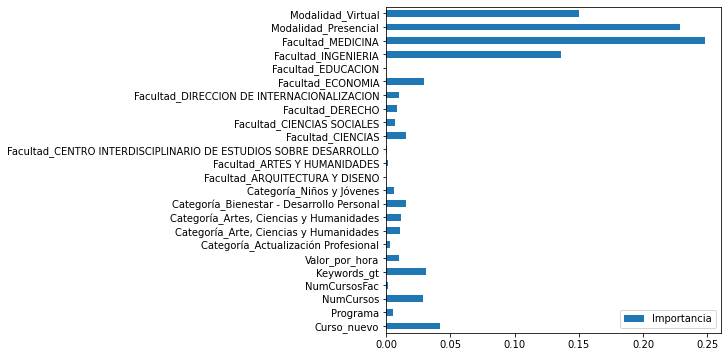

In [ ]:
# Visualización de la importancia train
importancia_rf_train.plot(kind='barh', figsize=(6,6))

### 4.4 buscar mejor hiperparámetros evaluados

#### 4.4.1 Grid Search basado en out-of-bag score

#### Out-of-Bag Error¶
la ventaja de disponer del Out-of-Bag error, lo que permite obtener una estimación del error de test sin tener que recurrir a procesos validación cruzada,

Dada la naturaleza del proceso de bagging en el que se basan los modelos de Random Forest, resulta posible estimar el error de test sin necesidad de recurrir a métodos de validación cruzada (cross-validation)

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train_prep, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
17,0.740741,entropy,3.0,9,150
16,0.728395,entropy,3.0,7,150
1,0.716049,gini,NaN,7,150
20,0.716049,entropy,10.0,9,150


In [ ]:
import multiprocessing

In [ ]:
# VERSIÓN PARALELIZADA
# ==============================================================================

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 123,
        ** params            
    )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_accuracy': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(x_train_prep, y_train, RandomForestClassifier(), params) for params in param_grid]
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
17,0.740741,entropy,3.0,9,150
16,0.728395,entropy,3.0,7,150
1,0.716049,gini,NaN,7,150
20,0.716049,entropy,10.0,9,150


In [ ]:
# Defino el RandomForest  con mejores hipperparametros 
# Creación del modelo
# ==============================================================================
modelo_mj_hipp  =  RandomForestClassifier(criterion= 'entropy',
                  max_depth=3, 
                  max_features= 9 , 
                  n_estimators=150,  
                  random_state=2022
                  )

In [ ]:
# Estimo el modelo para Train
modelo_mj_hipp.fit(x_train_prep, y_train)


RandomForestClassifier(criterion='entropy', max_depth=3, max_features=9,
                       n_estimators=150, random_state=2022)

In [ ]:
modelo_mj_hipp.score(x_train_prep, y_train)

0.8395061728395061

In [ ]:
predictions_x_train_prep_2 = modelo_mj_hipp.predict_proba(x_train_prep)

In [ ]:
predictions_x_train_prep_2

array([[0.26942219, 0.73057781],
       [0.30418836, 0.69581164],
       [0.17305994, 0.82694006],
       [0.61477957, 0.38522043],
       [0.17894056, 0.82105944],
       [0.62928248, 0.37071752],
       [0.17665092, 0.82334908],
       [0.29256001, 0.70743999],
       [0.1774745 , 0.8225255 ],
       [0.27039896, 0.72960104],
       [0.78933838, 0.21066162],
       [0.25293395, 0.74706605],
       [0.16381781, 0.83618219],
       [0.2010748 , 0.7989252 ],
       [0.26507011, 0.73492989],
       [0.24261014, 0.75738986],
       [0.18245518, 0.81754482],
       [0.32588965, 0.67411035],
       [0.86442132, 0.13557868],
       [0.17984408, 0.82015592],
       [0.83789838, 0.16210162],
       [0.1580416 , 0.8419584 ],
       [0.49044886, 0.50955114],
       [0.72400511, 0.27599489],
       [0.4230695 , 0.5769305 ],
       [0.19779791, 0.80220209],
       [0.26873223, 0.73126777],
       [0.17197899, 0.82802101],
       [0.53173631, 0.46826369],
       [0.50314021, 0.49685979],
       [0.

In [ ]:
# matrix de confucion 
pd.crosstab(y_train, modelo_mj_hipp.predict(x_train_prep))

col_0,0,1
validaExitoso,,
0,18,12
1,1,50


In [ ]:
print("accuracy: {:.4f}".format(accuracy_score(y_train,modelo_mj_hipp.predict(x_train_prep))))
print("precision: {:.4f}".format(precision_score(y_train,modelo_mj_hipp.predict(x_train_prep))))
print("recall: {:.4f}".format(recall_score(y_train,modelo_mj_hipp.predict(x_train_prep))))
print("f1: {:.4f}".format(f1_score(y_train,modelo_mj_hipp.predict(x_train_prep))))


accuracy: 0.8395
precision: 0.8065
recall: 0.9804
f1: 0.8850


In [ ]:
print(classification_report(y_test, modelo_mj_hipp.predict(x_train_prep)))